Agora que já nos debruçamos sobre a teoria, vamos começar a tratar nossos dados e a agregar valor a eles. Para isso, na pasta "Geopandas" (que contém o nosso projeto), criaremos uma nova pasta "03.Tratamento de Dados", dentro da qual iniciaremos um novo notebook Python.

In [2]:
%matplotlib inline
import geopandas as gpd

rj = gpd.read_file('Mapas/RJ-MUNIC/RJ-MUNIC.shp')
geo_dados = gpd.read_file('Mapas/RJ-DATASET/DATASET.shp')

Para começarmos nossa análise, vamos plotar o mapa da cidade do Rio de Janeiro. Como esse mapa nos servirá de base, vamos atribuí-lo a uma variável base:

<AxesSubplot:>

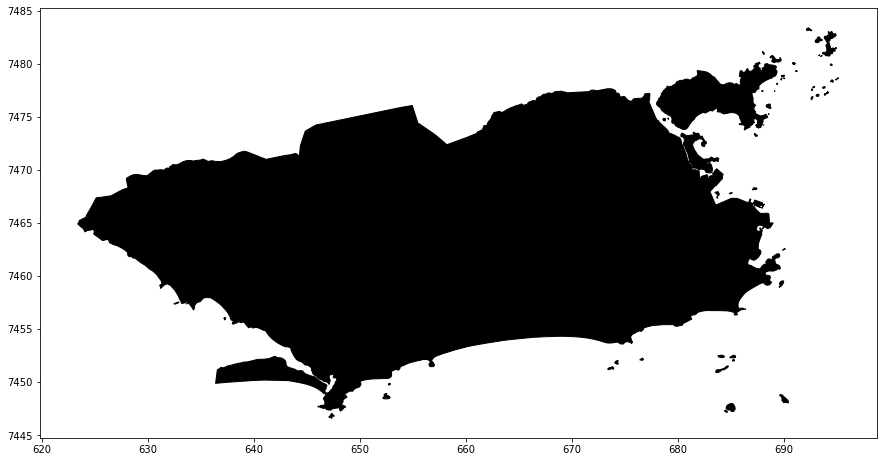

In [3]:
base = rj.plot(color='black', edgecolor='black', figsize=(15,8))
base

Em seguida, tentaremos plotar o conjunto geo_dados sobre essa base. Para isso, usaremos o atributo ax, recebendo a própria base como argumento, além de alpha=0.02, para configurarmos a transparência dos pontos na visualização, e figsize=(15,8), para mantermos as proporções de exibição:

<AxesSubplot:>

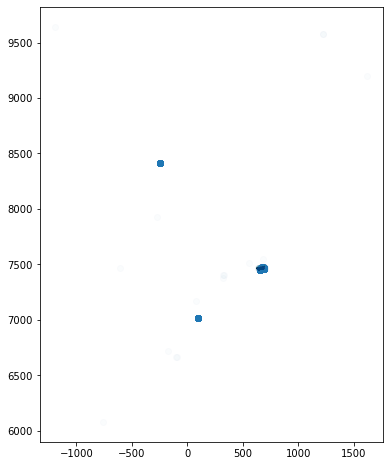

In [4]:
base = rj.plot(color='black', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, figsize=(15,8), alpha=0.02)

Porém, nosso resultado será apenas a plotagem de geo_dados, sem que ele seja sobreposto ao mapa da cidade.

A seguir, utilizando uma função do Geopandas, selecionaremos somente os pontos que estão na área do município do Rio de Janeiro.

Primeiramente, utilizaremos o comando rj.iloc[0].geometry para exibir a geometria desse conjunto. Nosso retorno será um multipolygon representando o município do Rio de Janeiro:



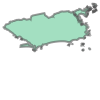

In [6]:
rj.iloc[0].geometry

Se fizermos geo_dados.iloc[0], teremos como retorno o primeiro registro desse arquivo, que é um imóvel no bairro Recreio dos Bandeirantes:

In [7]:
geo_dados.iloc[0]

Area                                                 138
Bairro                          Recreio dos Bandeirantes
Cidade                                    Rio de Janeiro
Endereco                             Rua Vicente Scofano
Estado                                                RJ
Latitude                                        -23.0165
Longitude                                       -43.4629
Quartos                                                3
Suites                                                 1
Vagas                                                  3
Tipo                                         Apartamento
Transacao                                          Venda
Valor                                            1095000
geometry     POINT (657.5137068691058 7453.832425203198)
Name: 0, dtype: object

Agora, utilizaremos a função within(), uma funcionalidade do Geopandas, para verificar se o ponto referente a esse registro está localizado na geometria da cidade do Rio de Janeiro:

In [8]:
geo_dados.iloc[0].geometry.within(rj.iloc[0].geometry)

True

Nosso retorno, nesse caso, será "True". Também podemos fazer essa operação de maneira "inversa", questionando se a região rj.iloc[0] contém o ponto geo_dados.iloc[0]:

In [9]:
rj.iloc[0].geometry.contains(geo_dados.iloc[0].geometry)

True

Obviamente, esse retorno também será verdadeiro. Queremos, então, executar esse processo para todos os registros em geo_dados. Para isso, executaremos a função within() a partir de toda a coluna "geometry":

In [10]:
geo_dados['geometry'].within(rj.iloc[0].geometry)

0        True
1        True
2        True
3        True
4       False
        ...  
4995     True
4996     True
4997     True
4998     True
4999     True
Length: 5000, dtype: bool

Isso nos devolverá uma series com os valores True ou False para cada um dos registros.

Para analisarmos melhor esses dados, criaremos uma pequena amostra com os 13 primeiros registros desse conjunto, e a plotaremos sobre o mapa da cidade do Rio de Janeiro:

<AxesSubplot:>

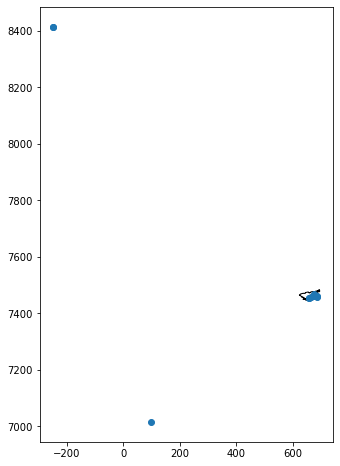

In [11]:
amostra = geo_dados.iloc[:12]
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
amostra.plot(ax=base, figsize=(15,8), alpha=1)

Nosso objetivo é, a partir da series retornada pela função within(), criarmos um dataframe contendo apenas os registros com True. Antes disso, passaremos para uma variável antes o retorno de geo_dados.shape[0], de modo a analisarmos quantos registros foram eliminados durante esse processo.

In [12]:
antes = geo_dados.shape[0]

In [13]:
antes

5000

Iremos, então, sobrescrever a variável geo_dados com uma seleção dos valores verdadeiros na series booleana devolvida pela função within():

In [14]:
geo_dados = geo_dados[geo_dados['geometry'].within(rj.iloc[0].geometry)]

Verificaremos quantos registros foram eliminados criando uma variável depois, que receberá geo_dados.shape[0], e a subtraindo da variável antes:

In [15]:
depois = geo_dados.shape[0]
antes - depois

487

Isso significa que 487 registros estavam fora da área da cidade do Rio de Janeiro. Como já sobrescrevemos nosso dataframe, vamos refazer a plotagem dos dados incluídos nele:

<AxesSubplot:>

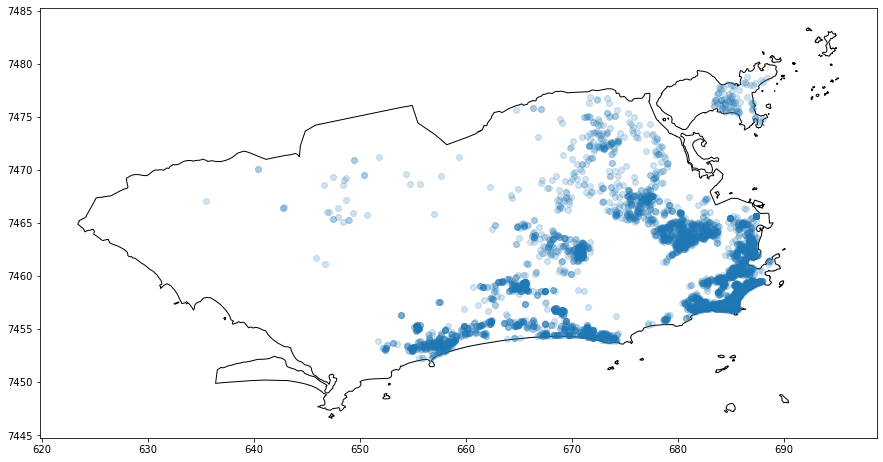

In [16]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, figsize=(15,8), alpha=0.2)

Dessa vez, é possível visualizar com clareza o mapa do Rio de Janeiro, contendo todos os pontos distribuídos em sua área. Como utilizamos alpha=0.2 para definirmos uma transparência, é possível verificar a densidade dos registros - quanto mais escura uma área, mais pontos se concentram nela.

Para finalizarmos essa etapa, vamos salvar nosso novo GeoDataFrame:

In [17]:
geo_dados.to_file('Mapas/RJ-DATASET/DATASET.shp')